In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [68]:
# Set features. This will also be used as your x values.
selected_features = df.drop(["koi_disposition"], axis=1)

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

# Create a Train Test Split

Use koi_disposition for the y values

In [6]:
target = df.koi_disposition

In [59]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state = 42)

In [60]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
target.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [62]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Model

In [63]:
# Random Forest has overfitting issue, use cross validation instead
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)
scores = cross_val_score(forest, selected_features, target, cv=7)
scores

array([0.78378378, 0.83983984, 0.91691692, 0.89089089, 0.93093093,
       0.94789579, 0.82865731])

In [64]:
print("Mean 7-Fold R Squared: {}".format(np.mean(scores)))

Mean 7-Fold R Squared: 0.8769879240821125


# Determine feature importance

In [97]:
importances = forest.feature_importances_
# sort = importances.argsort()
# sort
importances

array([0.10180325, 0.06275343, 0.1065381 , 0.0378927 , 0.02126828,
       0.01712075, 0.0191905 , 0.01357043, 0.0259721 , 0.02743932,
       0.01691699, 0.01140504, 0.01074074, 0.0231254 , 0.03326828,
       0.03645117, 0.0172111 , 0.01366058, 0.01228602, 0.06419541,
       0.02385284, 0.0267505 , 0.01670924, 0.01626027, 0.01513242,
       0.01297839, 0.04783689, 0.00284175, 0.00939411, 0.03216795,
       0.03209782, 0.0093802 , 0.00872265, 0.01054666, 0.00919832,
       0.01065144, 0.00824041, 0.01174463, 0.011844  , 0.01083993])

In [181]:
chosen_features = list(selected_features.columns)

optimal_df = pd.DataFrame({"Chosen_features":chosen_features, "Importances": importances})
opfeature_df = optimal_df[optimal_df["Importances"]>0.015].sort_values(by="Importances", ascending=True)
opfeature_df.head()
# features = zip(chosen_features, importances)

,Chosen_features,Importances
24,koi_insol_err1,0.015132
23,koi_insol,0.016260
22,koi_teq,0.016709
10,koi_impact,0.016917
5,koi_period_err1,0.017121


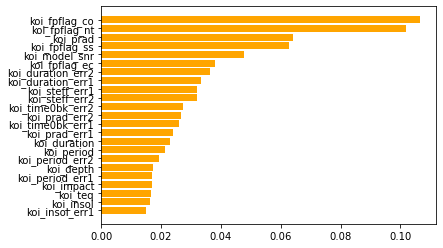

<Figure size 2880x2160 with 0 Axes>

In [184]:
plt.barh(opfeature_df.Chosen_features, opfeature_df.Importances, color="orange")
plt.figure(figsize=(40,30))
plt.show()

# Hyperparameter Tuning

Use RandomSearchCV to tune the model's parameters

In [185]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [200, 400, 800, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 50)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [186]:
# Train the model with RandomSearch
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)

In [187]:
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 12, 14, 16, 18, 20,
                                                      22, 24, 26, 28, 30, 32,
                                                      34, 36, 38, 40, 42, 44,
                                                      46, 48, 50, 52, 54, 56,
                                                      58, 61, 63, 65, 67, 69, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 800, 1000]},
                   random_state=42)

In [188]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 65, 'bootstrap': False}
0.8926174848285194


In [189]:
predictions = rf_random.predict(X_test_scaled)

In [190]:
print(predictions)

['FALSE POSITIVE' 'CANDIDATE' 'FALSE POSITIVE' ... 'CONFIRMED' 'CANDIDATE'
 'CONFIRMED']


In [191]:
# Apply Confusion Matrix for calculating prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [192]:
# Prediction accuracy
matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8981693363844394

In [193]:
matrix

array([[313,  79,  19],
       [ 68, 407,   9],
       [  2,   1, 850]])

<AxesSubplot:>

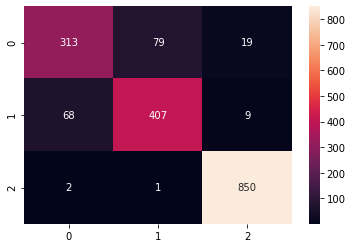

In [194]:
# Visualize matrix by using seaborn
sns.heatmap(matrix, annot = True, fmt="d")

In [195]:
# Calculating precision, recall rate and f1-score
report = classification_report(y_test, predictions)
print(report)

                precision    recall  f1-score   support

     CANDIDATE       0.82      0.76      0.79       411
     CONFIRMED       0.84      0.84      0.84       484
FALSE POSITIVE       0.97      1.00      0.98       853

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



# Save the Model

In [197]:
import joblib
filename = 'RandomForest_planet.sav'
joblib.dump(forest, 'Randome_planet.sav')

['Randome_planet.sav']